##### Video link
https://drive.google.com/file/d/154F55HvMHViJD6Z2DHll5iIYct_7A16w/view?usp=sharing

## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from warnings import filterwarnings
filterwarnings("ignore")

## Reading Data

In [2]:
df = pd.read_excel("FEV-data-Excel.xlsx")
df.head()

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


## Checking shape, Data types and Null Values in Data

In [3]:
df.shape

(53, 25)

In [4]:
df.dtypes

Car full name                              object
Make                                       object
Model                                      object
Minimal price (gross) [PLN]                 int64
Engine power [KM]                           int64
Maximum torque [Nm]                         int64
Type of brakes                             object
Drive type                                 object
Battery capacity [kWh]                    float64
Range (WLTP) [km]                           int64
Wheelbase [cm]                            float64
Length [cm]                               float64
Width [cm]                                float64
Height [cm]                               float64
Minimal empty weight [kg]                   int64
Permissable gross weight [kg]             float64
Maximum load capacity [kg]                float64
Number of seats                             int64
Number of doors                             int64
Tire size [in]                              int64


In [5]:
df.isna().sum()

Car full name                             0
Make                                      0
Model                                     0
Minimal price (gross) [PLN]               0
Engine power [KM]                         0
Maximum torque [Nm]                       0
Type of brakes                            1
Drive type                                0
Battery capacity [kWh]                    0
Range (WLTP) [km]                         0
Wheelbase [cm]                            0
Length [cm]                               0
Width [cm]                                0
Height [cm]                               0
Minimal empty weight [kg]                 0
Permissable gross weight [kg]             8
Maximum load capacity [kg]                8
Number of seats                           0
Number of doors                           0
Tire size [in]                            0
Maximum speed [kph]                       0
Boot capacity (VDA) [l]                   1
Acceleration 0-100 kph [s]      

## Handling Null values using median and mode for quatitative and qualitative columns respectively

In [6]:
df['mean - Energy consumption [kWh/100 km]'].fillna(df['mean - Energy consumption [kWh/100 km]'].median(),inplace=True)
df['Acceleration 0-100 kph [s]'].fillna(df['Acceleration 0-100 kph [s]'].median,inplace=True)
df['Boot capacity (VDA) [l]'].fillna(df['Boot capacity (VDA) [l]'].median(),inplace=True)
df['Permissable gross weight [kg]'].fillna(df['Permissable gross weight [kg]'].median(),inplace=True)
df['Maximum load capacity [kg]'].fillna(df['Maximum load capacity [kg]'].median(),inplace=True)
df['Type of brakes'].fillna(df['Type of brakes'].mode()[0],inplace=True)

## **Task 1**

#### **part a**

In [7]:
desired_cars = df[(df['Minimal price (gross) [PLN]'] <= 350000) & (df['Range (WLTP) [km]']>= 400)]
desired_cars

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
8,BMW iX3,BMW,iX3,282900,286,400,disc (front + rear),2WD (rear),80.0,460,...,2725.0,540.0,5,5,19,180,510.0,6.8,150,18.80
15,Hyundai Kona electric 64kWh,Hyundai,Kona electric 64kWh,178400,204,395,disc (front + rear),2WD (front),64.0,449,...,2170.0,485.0,5,5,17,167,332.0,7.6,100,15.40
18,Kia e-Niro 64kWh,Kia,e-Niro 64kWh,167990,204,395,disc (front + rear),2WD (front),64.0,455,...,2230.0,493.0,5,5,17,167,451.0,7.8,100,15.90
20,Kia e-Soul 64kWh,Kia,e-Soul 64kWh,160990,204,395,disc (front + rear),2WD (front),64.0,452,...,1682.0,498.0,5,5,17,167,315.0,7.9,100,15.70
22,Mercedes-Benz EQC,Mercedes-Benz,EQC,334700,408,760,disc (front + rear),4WD,80.0,414,...,2940.0,445.0,5,5,19,180,500.0,5.1,110,21.85
39,Tesla Model 3 Standard Range Plus,Tesla,Model 3 Standard Range Plus,195490,285,450,disc (front + rear),2WD (rear),54.0,430,...,2119.0,486.0,5,5,18,225,425.0,5.6,150,17.05
40,Tesla Model 3 Long Range,Tesla,Model 3 Long Range,235490,372,510,disc (front + rear),4WD,75.0,580,...,2119.0,486.0,5,5,18,233,425.0,4.4,150,17.05
41,Tesla Model 3 Performance,Tesla,Model 3 Performance,260490,480,639,disc (front + rear),4WD,75.0,567,...,2119.0,486.0,5,5,20,261,425.0,3.3,150,17.05
47,Volkswagen ID.3 Pro Performance,Volkswagen,ID.3 Pro Performance,155890,204,310,disc (front) + drum (rear),2WD (rear),58.0,425,...,2270.0,540.0,5,5,18,160,385.0,7.3,100,15.40


#### Explanation
Fetched the rows that are satisfying the following conditions\
    -condition 1 : price is less than or equal 350000\
    -condition 2 : range is greater than or equal to 400\
And stroing them in a new variable called desired cars

#### **part b**

In [8]:
desired_cars.groupby('Make').size()

Make
Audi             1
BMW              1
Hyundai          1
Kia              2
Mercedes-Benz    1
Tesla            3
Volkswagen       3
dtype: int64

#### Explanation
Grouping the desired cars down make the makers

#### **Part c**

In [9]:
desired_cars.groupby('Make')['Battery capacity [kWh]'].mean()

Make
Audi             95.000000
BMW              80.000000
Hyundai          64.000000
Kia              64.000000
Mercedes-Benz    80.000000
Tesla            68.000000
Volkswagen       70.666667
Name: Battery capacity [kWh], dtype: float64

#### Explanation
Grouping desired cars by makers and showing the results the average of battery capacity per maker

#### **Task 1 Findings**
1. In total 12 records are there where price <= 350000 and range >= 400\
**-- Among The filtered data --**
2. Telsa and volkswagon together holds 50% of total share 6/12 cars with 3 cars each.
3. Kia have 2 cars while rest having 1 car each.
4. Audi is having the greatest battery capacity with 95 kwh as average.
5. Tesla is having least battery capacity with 70 kwh as average



## **Task 2**

#### Renaming enery consumption column for easy use

In [10]:
df.rename(columns={'mean - Energy consumption [kWh/100 km]': 'mean - Energy consumption'}, inplace=True)

### Getting Quantile ranges for the data OR Splitting data in q0 - q4
### Finding IQR : Inter Quartile Range
### Finding Lower and Upper Bounds

In [11]:
q0 = np.quantile(df['mean - Energy consumption'],0)
q1 = np.quantile(df['mean - Energy consumption'],0.25)
q2 = np.quantile(df['mean - Energy consumption'],0.5)
q3 = np.quantile(df['mean - Energy consumption'],0.75)
q4 = np.quantile(df['mean - Energy consumption'],1)

In [12]:
print(f"Q0 (Min): {q0}")
print(f"Q1 (25th Percentile): {q1}")
print(f"Q2 (Median): {q2}")
print(f"Q3 (75th Percentile): {q3}")
print(f"Q4 (Max): {q4}")

Q0 (Min): 13.1
Q1 (25th Percentile): 15.9
Q2 (Median): 17.05
Q3 (75th Percentile): 21.85
Q4 (Max): 28.2


In [13]:
iqr = q3 - q1
round(iqr,2)

5.95

In [14]:
lb = q1 - (1.5*iqr)
ub = q3 + (1.5*iqr)

### Finding records having energy consumption above upper bound OR energy consumption below lower bound. As they are OUTLIERS

In [15]:
df[(df['mean - Energy consumption']>ub) | (df['mean - Energy consumption'] < lb)]

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption


### Boxplot for visulaizing outliers

<Axes: ylabel='mean - Energy consumption'>

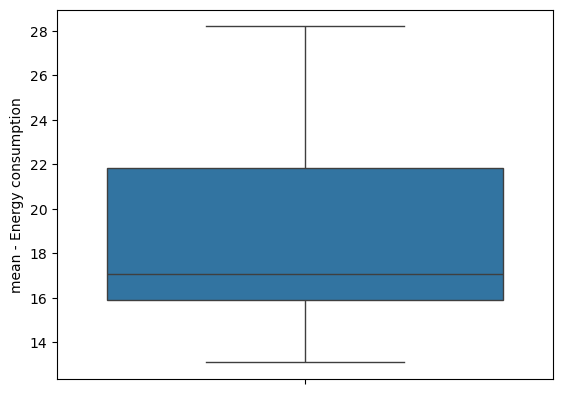

In [16]:
sns.boxplot(df['mean - Energy consumption'])

### Result : Outliers are not there hence 0 rows were fetched

### **Task 3 part A and B**

In [17]:
num = df.select_dtypes(exclude='object') # Getting only quantitative columns for analyzing correlation

#### Steps
1. Set figure size as 20,10
2. Set figure title
3. Created subplot for 1 rows 2 columns and 1st plot
4. Create a line plot
5. Subplot for 1 row 2 columns and 2nd plot
6. Make Tight layout for proper alignment of visuals.

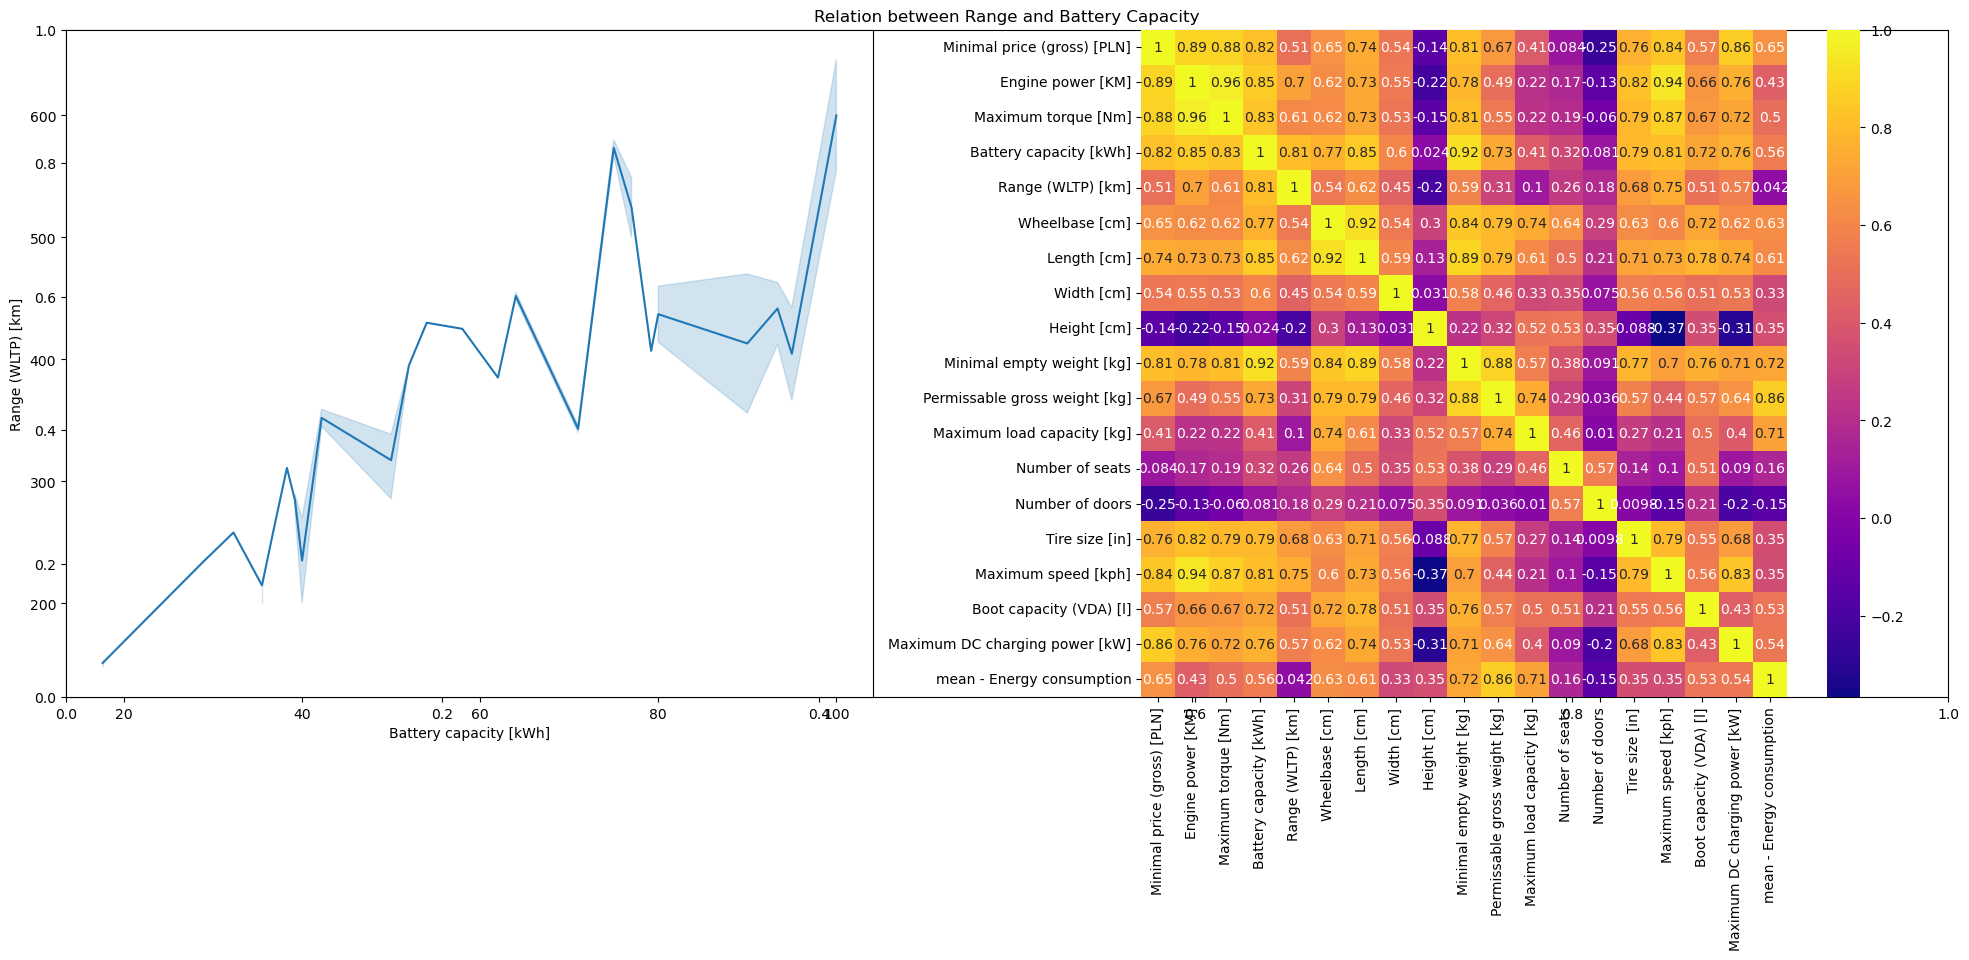

In [18]:
plt.figure(figsize=(20,10))
plt.title("Relation between Range and Battery Capacity")
plt.subplot(1,2,1)
sns.lineplot(data=df,x="Battery capacity [kWh]",y="Range (WLTP) [km]")
plt.subplot(1,2,2)
sns.heatmap(num.corr(),annot=True,cmap='plasma')
plt.tight_layout()
plt.show()

#### Findings : There is a positive correlation between battery capacity.
#### From the heatmap we can analyze that range and battery capcity are highly correlated with a strong positive correlation of 81%

### **Task 4**

#### Steps
1. Defined the class fetch_top_3_evs
2. Defined the constructor with arguments price, range and battery
3. Defined fetch_details method
4. fileterd rows that are
    1. Less than or equal to user price.
    2. Greater than or equal to user desired range.
    3. And Greater than or equal to user desired battery capacity
5. Sorted them by price, then by name and then by battery capacity in descending, descending, ascending order respectively
6. Filetered only desired columns
7. Took the top 3 rows only.
8. Save the outputs to a new csv file.
9. Retured the Output.
10. Took the inputs from the user.
11. Applied the class and methods.
12. Got the output

In [19]:
import pandas as pd
class fetch_top_3_evs:
    def __init__(self,price,range,battery):
        self.price = price
        self.range = range
        self.battery = battery
    
    def fetch_details(self):
        needed = df[(df['Minimal price (gross) [PLN]'] <= self.price) & (df['Range (WLTP) [km]'] >= self.range) & (df['Battery capacity [kWh]'] >= self.battery)]
        needed_sorted = needed.sort_values(by=['Minimal price (gross) [PLN]','Range (WLTP) [km]','Battery capacity [kWh]'],
                                   ascending=[False,False,True])
        top3cars = needed_sorted[['Car full name', 'Make', 'Model', 'Minimal price (gross) [PLN]','Range (WLTP) [km]','Battery capacity [kWh]']]
        top3cars = top3cars.head(3)
        top3cars.to_csv("Top 3 cars.csv",index=False)
        return top3cars
price = int(input("Enter your Maximum price"))
range = int(input("Enter minimum range limit you need"))
battery = float(input("Enter minimum battery requirement"))
cust1 = fetch_top_3_evs(price,range,battery)
top3 = cust1.fetch_details()
top3

,Car full name,Make,Model,Minimal price (gross) [PLN],Range (WLTP) [km],Battery capacity [kWh]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,438,95.0
51,Mercedes-Benz EQV (long),Mercedes-Benz,EQV (long),339480,356,90.0
22,Mercedes-Benz EQC,Mercedes-Benz,EQC,334700,414,80.0


#### **Task 4 Findings**
Details of Top 3 cars are fetched with the help of object oriented programmings concepts

## **Task 5**

### Setting Null Hypothesis
1. **Ho** : There is no significant difference between average engine power of vehicals manufactured by Tesla and Audi.
2. **H1** : There is a significant difference between average engine power of vehicals manufactured by Tesla and Audi

### Importing necessary Library

In [23]:
from scipy.stats import ttest_ind

#### 1. Summarizing Data
#### 2. Performing Two Sample T-Test using ttest_ind
#### 3. Setting Level of significance or alpha to 0.05
#### 4. Results

In [24]:
#Summarizing the Data
tesla_avg_power = df[df['Make'] == 'Tesla']['Engine power [KM]']
audi_avg_power = df[df['Make'] == 'Audi']['Engine power [KM]']

#Performing T test
t_stat, p_value = ttest_ind(tesla_avg_power, audi_avg_power)
print("T-Test Result:")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

#Level of Significance
alpha = 0.05

#Results
if p_value < alpha:
    print("Result: Reject the null hypothesis. There is a significant difference in the average Engine Power between Tesla and Audi.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference in the average Engine Power between Tesla and Audi.")

T-Test Result:
T-Statistic: 1.7024444538261416
P-Value: 0.11672692675082785
Result: Fail to reject the null hypothesis. No significant difference in the average Engine Power between Tesla and Audi.


### Insights
1. The obtained P value is 0.1167 whihc is greater than level of significance or alpha which is 0.05.
2. Hence the null hypothesis is accepted and there is no significant difference in between the average engine power of Tesla and Audi, based on the given dataset.
3. From here we can infer that according to this data, both tesla and audi are manufacturing vehicles of similar engine power.

### Recommendations
1. Try focusing on other parameters : They should enchance their features to gain an edge over their competitors like
    1. They should focus on improving range, battery capacity.
    2. Give various discounts to attaract more consumer base.

2. Should Analyze other parameters like range, price, battery capacity in order to get a detailed idea of their strengths and weaknesses as compared to their compatitors.

### Conclusion
Since the obtained p value in 0.1167 which is greater than the level of significance which is 0.05 hence we **fail to reject the null Hypothesis**. Hence it shows that based on the current data there is **no significant difference in the average engine power** of vehicles manufactured by Tesla or Audi. Both manufacturers are thus having a close competition on the grounds on engine power and hence they should focus on improving their other factors like **Battery Capacity**, **Range**, or the **Price of the Vehical** to gain the edge.